# 1000ml Retail Project

## Import libraries

In [209]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


plt.rcParams['figure.facecolor'] = 'w'

## import data

In [56]:
#setting dataframe as df
df = pd.read_csv("/home/bonk/Downloads/advertising.csv")

## checking the data

In [182]:
df.head(20)

,Day,Social,Google Adwords,Youtube,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,12.0
3,4,151.5,41.3,58.5,16.5
4,5,180.8,10.8,58.4,17.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,15.6


In [5]:
df.tail()

,Day,Social,Google Adwords,Youtube,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,14.0
197,198,177.0,9.3,6.4,14.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,18.4


A total of 200 days of sales have been observed. Marketing techniques such as social media, google adwords and youtube are tracked and compared to the number of sales. No units are given to us so we assume it is per unit price.

In [6]:
df.corr()['Sales']

Day              -0.021306
Social            0.901208
Google Adwords    0.349631
Youtube           0.157960
Sales             1.000000
Name: Sales, dtype: float64

The table above shows the correlation between everything to Sales. There is a negative correlation between the days that passes by and Sales. This is just a very small value though. Social media seems to have the highest correlation to Sales and Youtube has the least with Google Adwords being in the middle and leaning towards the lower end. 

Visualization of the relationship between sales and advertising

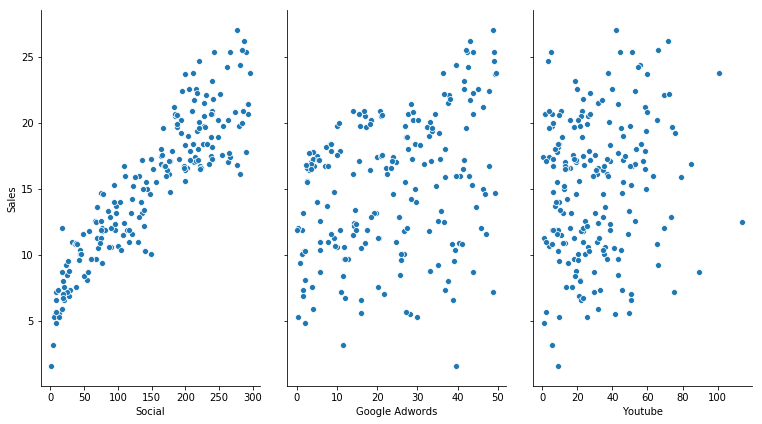

In [47]:
sns.pairplot(df,
             x_vars=['Social','Google Adwords','Youtube'],
             y_vars='Sales',
            size= 6,
            aspect=0.6)

## Heatmap

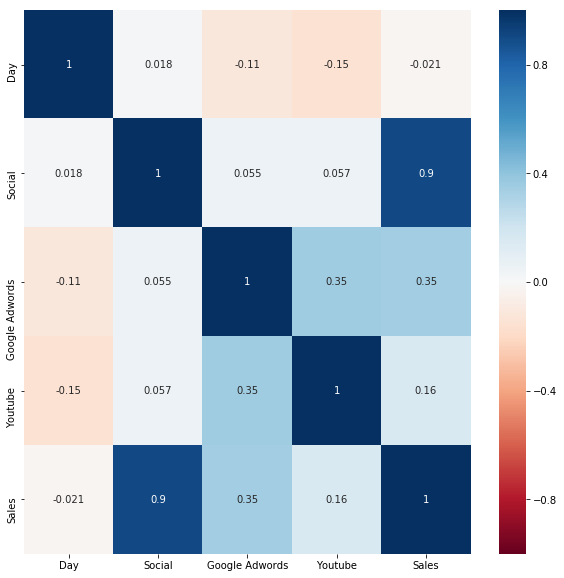

In [4]:
plt.figure(figsize = (10,10))

sns.heatmap(df.corr().round(3),
           cmap="RdBu",
           vmin = -1,
           vmax=1,
           annot=True)
plt.show()

This heatmap shows the correlation between all the columns. The more blue it is, the better the correlation gets and vice versa with red.

In [14]:
plt.figure(figsize = (10,10))

sns.heatmap(df[['Social','Sales','Google Adwords']].pivot(),
           cmap="RdBu",
           vmin = -1,
           vmax=1,
           annot=True)
plt.show()

KeyError: 'None of [None] are in the columns'

<Figure size 720x720 with 0 Axes>

In [29]:
df[['Social','Google Adwords','Sales']].round({"Social":-1, "Google Adwords":0}).head()

,Social,Google Adwords,Sales
0,230.0,38.0,22.1
1,40.0,39.0,10.4
2,20.0,46.0,12.0
3,150.0,41.0,16.5
4,180.0,11.0,17.9


In [34]:
df[['Social','Google Adwords','Sales']].round({"Social":-1, "Google Adwords":0}).groupby(by=['Social','Google Adwords']).sum().reset_index()

,Social,Google Adwords,Sales
0,0.0,12.0,3.2
1,0.0,40.0,1.6
2,10.0,0.0,5.3
3,10.0,2.0,4.8
4,10.0,16.0,5.6
...,...,...,...
183,290.0,14.0,20.9
184,290.0,28.0,42.1
185,290.0,42.0,25.4
186,290.0,43.0,26.2


In [38]:
df_temp = df[['Social','Google Adwords','Sales']].round({"Social":-1, "Google Adwords":-1}).groupby(by=['Social','Google Adwords']).sum().reset_index().pivot('Social','Google Adwords','Sales')

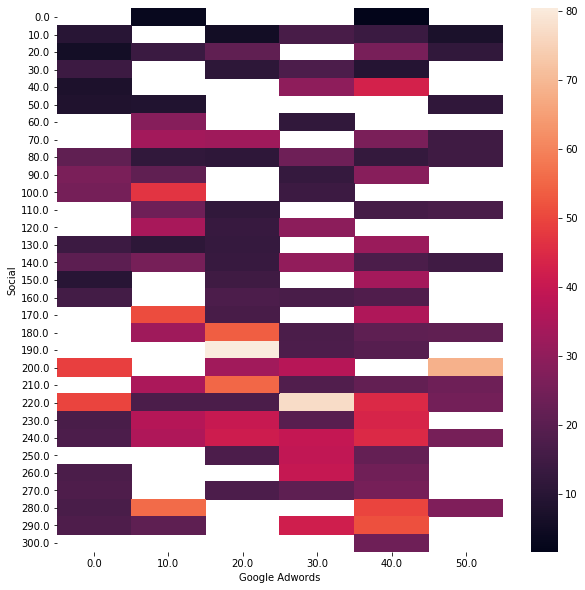

In [39]:
plt.figure(figsize = (10,10))

sns.heatmap(df_temp,
           annot=False)
plt.show()

In [58]:
df.describe()

,Day,Social,Google Adwords,Youtube,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,15.130500
std,57.879185,85.854236,14.846809,21.778621,5.283892
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,11.000000
50%,100.500000,149.750000,22.900000,25.750000,16.000000
75%,150.250000,218.825000,36.525000,45.100000,19.050000
max,200.000000,296.400000,49.600000,114.000000,27.000000


The table above shows a summary of the data, from the maximum of all columns to the minium and mean of all columns. 

# Social vs Sales

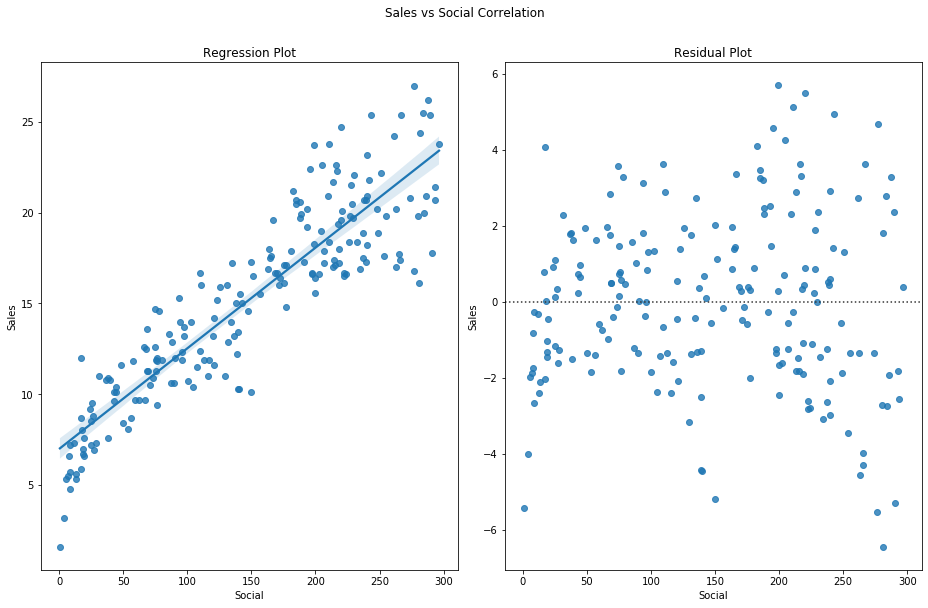

In [59]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,8))
#Regression plot
sns.regplot(x='Social',
           y='Sales',
           data=df,
           ax=ax1)
#Residual Plot
sns.residplot(x='Social',
           y='Sales',
           data=df,
           ax=ax2)

#Title of Regression plot
ax1.set_title("Regression Plot")
#Title of Residual Plot
ax2.set_title("Residual Plot")


plt.tight_layout()

fig.suptitle("Sales vs Social Correlation", y=1.05)

plt.show()

As you can see from the graph, there is a huge postive correlation between sales and the use of social media. This is a channel worth looking into and possibly investing more into. 

In [60]:
X_social = df['Social']
y = df['Sales']

In [61]:
X_social = sm.add_constant(X_social)
X_social.head()

,const,Social
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [63]:
lin_model_social = sm.OLS(y, X_social, hasconst=True).fit()

In [255]:
lin_model_social.params

const     6.974821
Social    0.055465
dtype: float64

you need 20 units of socials to move up 1 unit of sales.

In [256]:
lin_model_social.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Thu, 07 May 2020   Prob (F-statistic):           7.93e-74
Time:                        04:43:10   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.000       6.339       7.611
Social         0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Google adwords vs Sales

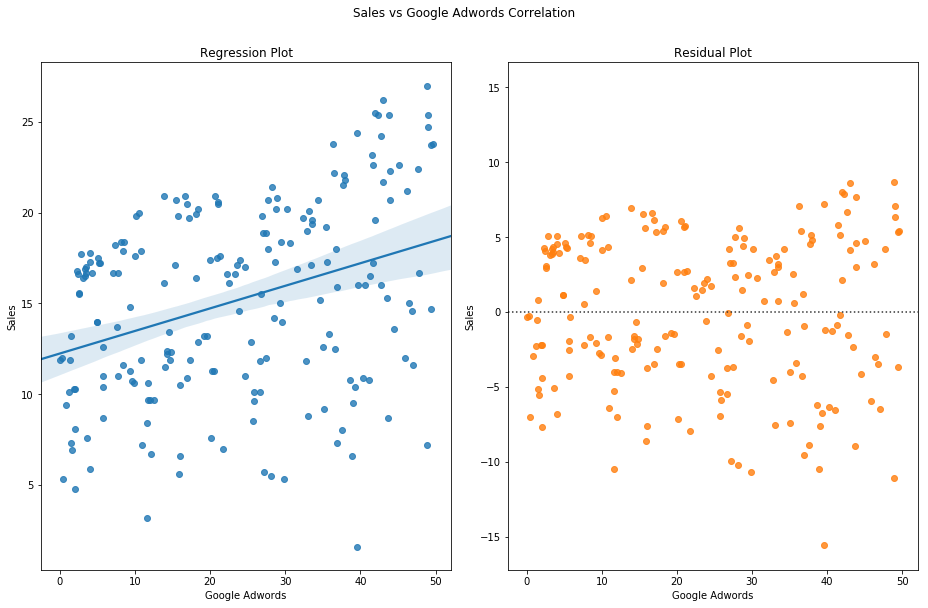

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,8))
#Regression plot
sns.regplot(x='Google Adwords',
           y='Sales',
           data=df,
           ax=ax1)
#Residual Plot
sns.residplot(x='Google Adwords',
           y='Sales',
           data=df,
           ax=ax2)

#Title of Regression plot
ax1.set_title("Regression Plot")
#Title of Residual Plot
ax2.set_title("Residual Plot")


plt.tight_layout()

fig.suptitle("Sales vs Google Adwords Correlation", y=1.05)

plt.show()

There is also a positive correlation between Google Adwords and Sales. The slope of the graph is not as steep as the previous but positive nonetheless. The points are also more spread apart indicating there might be more to it. 

In [65]:
X_google = df['Google Adwords']
y = df['Sales']

In [66]:
X_google = sm.add_constant(X_google)
X_google.head()

,const,Google Adwords
0,1.0,37.8
1,1.0,39.3
2,1.0,45.9
3,1.0,41.3
4,1.0,10.8


In [266]:
lin_model_google = sm.OLS(y, X_google, hasconst=True).fit()

In [267]:
lin_model_google.params

const             12.235722
Google Adwords     0.124432
dtype: float64

In [268]:
lin_model_google.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     27.57
Date:                Thu, 07 May 2020   Prob (F-statistic):           3.88e-07
Time:                        04:44:58   Log-Likelihood:                -603.18
No. Observations:                 200   AIC:                             1210.
Df Residuals:                     198   BIC:                             1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.2357      0.653     18.724      0.000      10.947      13.524
Google Adwords     0.1244      0.024      5.251      0.000       0.078       0.171
==============================================================================
Omnibus:                       11.077   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                9.124
Skew:                          -0.433   Prob(JB):                       0.0104
Kurtosis:                       2.414   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Youtube vs Sales

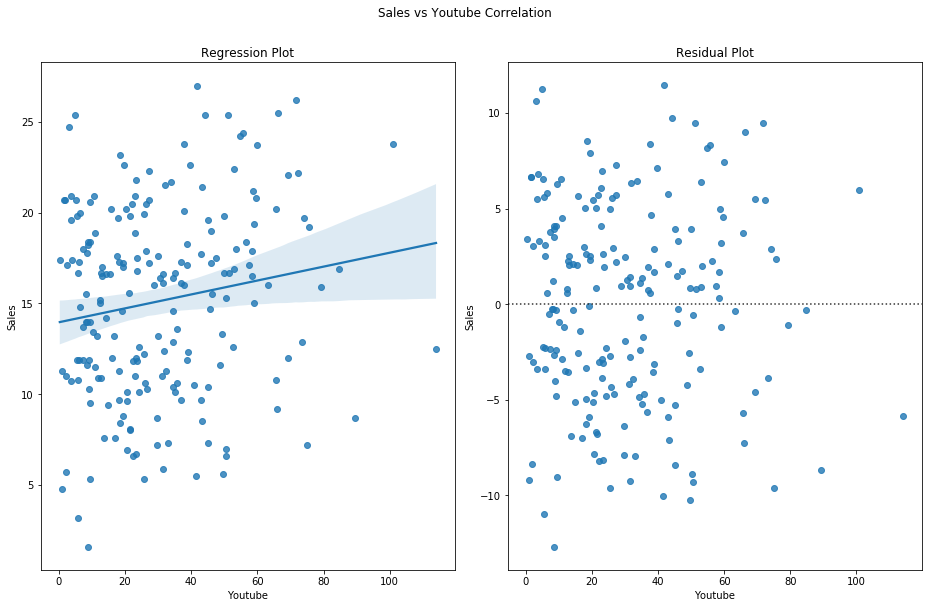

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,8))
#Regression plot
sns.regplot(x='Youtube',
           y='Sales',
           data=df,
           ax=ax1)
#Residual Plot
sns.residplot(x='Youtube',
           y='Sales',
           data=df,
           ax=ax2)

#Title of Regression plot
ax1.set_title("Regression Plot")
#Title of Residual Plot
ax2.set_title("Residual Plot")


plt.tight_layout()

fig.suptitle("Sales vs Youtube Correlation", y=1.05)

plt.show()

Youtube seems to have to least effect on sales compared to the other choices. 

In [259]:
X_Youtube = df['Youtube']
y = df['Sales']

In [260]:
X_Youtube = sm.add_constant(X_Youtube)
X_Youtube.head()

,const,Youtube
0,1.0,69.2
1,1.0,45.1
2,1.0,69.3
3,1.0,58.5
4,1.0,58.4


In [264]:
lin_model_Youtube = sm.OLS(y, X_Youtube, hasconst=True).fit()

In [265]:
lin_model_Youtube.params

const      13.959549
Youtube     0.038324
dtype: float64

In [269]:
lin_model_Youtube.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.067
Date:                Thu, 07 May 2020   Prob (F-statistic):             0.0255
Time:                        04:45:33   Log-Likelihood:                -613.69
No. Observations:                 200   AIC:                             1231.
Df Residuals:                     198   BIC:                             1238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9595      0.638     21.870      0.000      12.701      15.218
Youtube        0.0383      0.017      2.251      0.025       0.005       0.072
==============================================================================
Omnibus:                       10.252   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.808
Skew:                          -0.111   Prob(JB):                       0.0903
Kurtosis:                       2.273   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression Modeling

In [72]:
#Set variables
X1 = df[['Youtube','Google Adwords','Social']]
y1 = df['Sales']

#add constant
X1 = sm.add_constant(X1)

In [73]:
#model
lin_model_all = sm.OLS(y1, X1, hasconst=True).fit()

In [74]:
print(lin_model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 06 May 2020   Prob (F-statistic):           8.13e-99
Time:                        21:46:34   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.6251      0.308     15.

P values for google Adwords and Social are 0 and are significant to show that there is a correlation between those and sales, whereas Youtube is significantly higher to show that there are less correlation to sales.




In [75]:
lin_model_all.mse_resid

2.7612307628850163

In [129]:
#Set variables
X2 = df[['Youtube','Google Adwords','Social']]
y2 = df['Sales']

#add constant
# X2 = sm.add_constant(X2)

In [130]:
#Train Test Split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,
                                                       y2,
                                                       test_size = 0.2,
                                                       random_state = 42)

## OLS without scaling

In [131]:
lin_model_train = sm.OLS(y2_train, sm.add_constant(X2_train)).fit()

In [132]:
print(lin_model_train.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     468.7
Date:                Wed, 06 May 2020   Prob (F-statistic):           8.51e-78
Time:                        21:58:32   Log-Likelihood:                -305.78
No. Observations:                 160   AIC:                             619.6
Df Residuals:                     156   BIC:                             631.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.7141      0.352     13.

In [133]:
lin_model_train.mse_resid

2.7447616961873527

In [135]:
y2_test_predictions = lin_model_train.predict(sm.add_constant(X2_test))

In [150]:
mean_squared_error(y2_test, y2_test_predictions)

2.907756910271092

In [156]:
np.abs(lin_model_train.mse_resid - mean_squared_error(y2_test, y2_test_predictions)) / lin_model_train.mse_resid

0.05938410402263695

error between training and testing data is ~5%

In [136]:
r2_score(y2_test, y2_test_predictions)

0.9059011844150826

In [137]:
lin_model_train.rsquared - r2_score(y2_test, y2_test_predictions)

-0.005759583828869541

## OLS With scaling

In [169]:
#Scale data with scalar object
scaler = StandardScaler()

scaler.fit(X2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [170]:
# transforming train and test data
X2_train_scale = scaler.transform(X2_train)
X2_test_scale = scaler.transform(X2_test)

In [171]:
X2_train_scale = sm.add_constant(X2_train_scale)
X2_test_scale = sm.add_constant(X2_test_scale)

In [172]:
#Fitting model
lin_model_train_scale = sm.OLS(y2_train, X2_train_scale).fit()

In [211]:
#set linear regression object
lin_reg =LinearRegression()

lin_reg.fit(X2_train_scale, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [212]:
lin_reg.coef_

array([0.09420978, 1.49496505, 4.66813753])

In [173]:
print(lin_model_train_scale.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     468.7
Date:                Wed, 06 May 2020   Prob (F-statistic):           8.51e-78
Time:                        22:40:07   Log-Likelihood:                -305.78
No. Observations:                 160   AIC:                             619.6
Df Residuals:                     156   BIC:                             631.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2102      0.131    115.984      0.0

In [174]:
#r2_value for scaled test data
y2_test_scale_prediction = lin_model_train_scale.predict(X2_test_scale)

r2_score(y2_test, y2_test_scale_prediction)

0.9059011844150826

In [175]:
X2_train.columns

Index(['Youtube', 'Google Adwords', 'Social'], dtype='object')

In [176]:
X2_train_scale.shape

(160, 4)

In [206]:
lin_model_train_scale.params

const    15.210201
x1        0.094210
x2        1.494965
x3        4.668138
dtype: float64

From the above analysis, Youtube has a coefficient very close to 0 meaning it is very insignificant towards the sales in terms of advertising. This form of advertising clearly isn't working or something must be done to change it. Maybe it is better to remove it completely and focus on the other two or look for alternatives. Social and Google Adwords on the other hand are significant and correlates well towards sales. 

In [181]:
np.abs(lin_model_train_scale.mse_resid - mean_squared_error(y2_test, y2_test_scale_prediction)) / lin_model_train_scale.mse_resid

0.05938410402263694

Comparing scaled and unscaled mean squared error, it is seen that they are very similar. 

## LASSO Regression Model

In [197]:
#Scaler
scaler = StandardScaler()

scaler.fit(X2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [198]:
# transforming train and test data
X2_train_scale = scaler.transform(X2_train)
X2_test_scale = scaler.transform(X2_test)

In [199]:
#Setting the LASSO regression object
lasso_reg = Lasso(alpha = 1, random_state = 42)

#Fitting the object
lasso_reg.fit(X2_train_scale, y2_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=42, selection='cyclic',
      tol=0.0001, warm_start=False)

In [200]:
lasso_reg.coef_

array([0.        , 0.57455834, 3.68453505])

In [201]:
for x,y in zip(lasso_reg.coef_, X2_train.columns):
    print(f"{y}:{x}")

Youtube:0.0
Google Adwords:0.5745583445673259
Social:3.684535048673989


## Ridge Regression

In [203]:
#Build Ridge Model
ridge_reg=Ridge(alpha =1)
ridge_reg.fit(X2_train_scale, y2_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [204]:
for x,y in zip(ridge_reg.coef_, X2_train.columns):
    print(f"{y}:{x}")

Youtube:0.0978781708303854
Google Adwords:1.4858533096014168
Social:4.6385459832662574


## Putting both coefficients into a dataframe

In [216]:
coef_df = pd.DataFrame([lin_reg.coef_, lasso_reg.coef_, ridge_reg.coef_], columns = X2.columns).transpose()
coef_df.columns = ['regular','lasso','ridge']

In [217]:
coef_df

,regular,lasso,ridge
Youtube,0.094210,0.000000,0.097878
Google Adwords,1.494965,0.574558,1.485853
Social,4.668138,3.684535,4.638546


In [219]:
model_list = [lin_reg, lasso_reg, ridge_reg]

train_r2_list =[]
test_r2_list =[]
train_mse_list =[]
test_mse_list = []
for model in model_list:
  #appending train score to list
  train_r2_list.append(model.score(X2_train_scale, y2_train))
  #appending test score to list
  test_r2_list.append(model.score(X2_test_scale,y2_test))
  #appending train MSE to list
  train_mse_list.append(mean_squared_error(y2_train, model.predict(X2_train_scale)))
  #appending test MSE to list
  test_mse_list.append(mean_squared_error(y2_test, model.predict(X2_test_scale)))

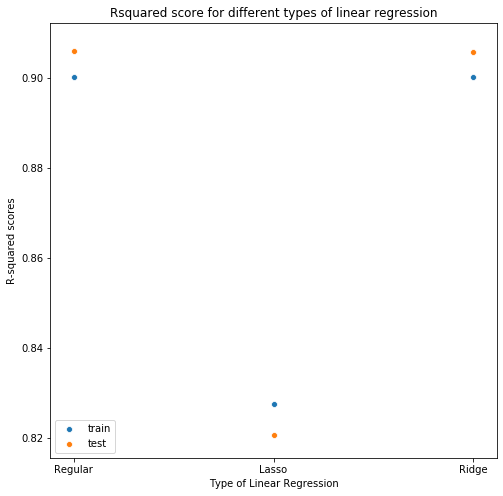

In [221]:
# Creating scatterplot to compare scores
fig,ax = plt.subplots(figsize=(8,8))
r2_compare = ['Regular', 'Lasso','Ridge']
sns.scatterplot(r2_compare, train_r2_list, label='train')
sns.scatterplot(r2_compare, test_r2_list, label = 'test')
plt.xlabel("Type of Linear Regression")
plt.ylabel('R-squared scores')
plt.title('Rsquared score for different types of linear regression')
plt.show()

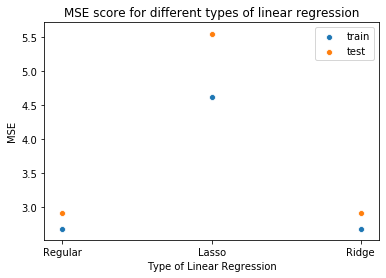

In [222]:
mse_compare = ['Regular', 'Lasso','Ridge']
sns.scatterplot(mse_compare, train_mse_list, label='train')
sns.scatterplot(mse_compare, test_mse_list, label = 'test')
plt.xlabel("Type of Linear Regression")
plt.ylabel('MSE')
plt.title('MSE score for different types of linear regression')
plt.show()

Regular and Ridge regression had the highest $R^2$ value and lasso regression had the highest MSE value. Ridge and regular had the most consistent values between the sets. Lasso regression does not seem to be a good choice. Either ridge or regular regression would be picked for their low error score.

# Using the Ridge Regression Model

In [227]:
X2_rest, X2_test, y2_rest, y2_test = train_test_split(X2, 
                                                      y2, 
                                                      test_size = 0.2, 
                                                      random_state=42)

In [230]:
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_rest,
                                                     y2_rest,
                                                     test_size = 0.25,
                                                     random_state=42)

In [231]:
#Scaling
scaler_2=StandardScaler()

#model
scaler_2.fit(X2_train)

#Transforms
X2_train_scale = scaler_2.transform(X2_train)
X2_val_scale = scaler_2.transform(X2_val)
X2_test_scale = scaler_2.transform(X2_test)

In [232]:
#set alpha range
alpha_range = [np.power(10,float(number)) for number in range (-5,7)]

In [233]:
alpha_range=[]

for number in range(-5,7):
    new_value = np.power(10,float(number))
    alpha_range.append(new_value)

In [234]:
#Setting model
ridge_model = Ridge(alpha=0.0001)

#fitting model
ridge_model.fit(X2_train_scale, y2_train)

#Getting R2 scores
print(f'Train R2: {ridge_model.score(X2_train_scale, y2_train): .2f}')
print(f'Val R2: {ridge_model.score(X2_val_scale, y2_val):.2f}')
#Get the MSE scores
y2_train_predict = ridge_model.predict(X2_train_scale)
print(f'Train MSE: {mean_squared_error(y2_train, y2_train_predict): .2f}')
y2_val_predict = ridge_model.predict(X2_val_scale)
print(f'Val MSE: {mean_squared_error(y2_val, y2_val_predict):.2f}')


Train R2:  0.91
Val R2: 0.84
Train MSE:  2.57
Val MSE: 3.10


In [235]:
train_r2_list = []
val_r2_list = []
train_mse_list = []
val_mse_list=[]
for alpha_num in alpha_range:
  #fit a ridge regression
  ridge_model = Ridge(alpha =alpha_num)
  ridge_model.fit(X2_train_scale, y2_train)
  #find the train and val R2 scores
  train_r2=ridge_model.score(X2_train_scale, y2_train)
  val_r2 = ridge_model.score(X2_val_scale,y2_val)
  #Find the train and val MSE scores
  #Find prediction values
  y2_train_predict = ridge_model.predict(X2_train_scale)
  y2_val_predict = ridge_model.predict(X2_val_scale)
  #Now calculate MSE
  y2_train_mse =mean_squared_error(y2_train, y2_train_predict)
  y2_val_mse = mean_squared_error(y2_val, y2_val_predict)
  #append values to lists
  train_r2_list.append(train_r2)
  val_r2_list.append(val_r2)
  train_mse_list.append(y2_train_mse)
  val_mse_list.append(y2_val_mse)


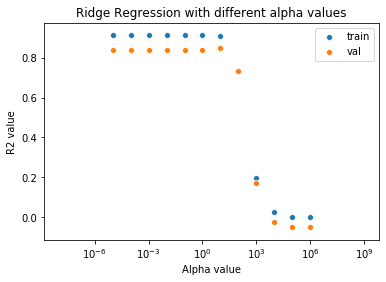

In [237]:
# Graph the r2 values
plt.xscale('log')
#plotting train values
sns.scatterplot(alpha_range, train_r2_list, label = 'train')
sns.scatterplot(alpha_range, val_r2_list, label='val')
plt.xlabel('Alpha value')
plt.ylabel('R2 value')
plt.title("Ridge Regression with different alpha values")
plt.show()

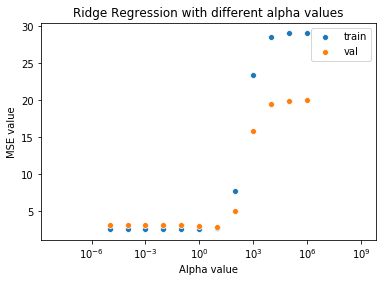

In [238]:
#Graph the MSE values
plt.xscale('log')
#plotting train values
sns.scatterplot(alpha_range, train_mse_list, label = 'train')
sns.scatterplot(alpha_range, val_mse_list, label='val')
plt.xlabel('Alpha value')
plt.ylabel('MSE value')
plt.title("Ridge Regression with different alpha values")
plt.show()

In [239]:
alg=['ridge']*len(alpha_range)
ridge_perf_df = pd.DataFrame(np.c_[alg, alpha_range, train_r2_list, val_r2_list, train_mse_list, val_mse_list])

ridge_perf_df.columns=['model_name','alpha (10^x)','ridge_r2_train','ridge_r2_val','ridge_mse_train','ridge_mse_val']
ridge_perf_df

,model_name,alpha (10^x),ridge_r2_train,ridge_r2_val,ridge_mse_train,ridge_mse_val
0,ridge,1e-05,0.9119710442315772,0.8371158266286804,2.5660467504231748,3.0966062903534093
1,ridge,0.0001,0.9119710442310065,0.8371160139239461,2.566046750439808,3.096602729665558
2,ridge,0.001,0.9119710441739463,0.837117886798364,2.566046752103115,3.0965671242744164
3,ridge,0.01,0.9119710384687635,0.8371366077200083,2.5660469184093686,3.096211219077948
4,ridge,0.1,0.9119704687889721,0.8373230358190175,2.5660635245926944,3.0926670170100525
5,ridge,1.0,0.9119143292124661,0.8391103278928831,2.56769999496322,3.05868863983516
6,ridge,10.0,0.9070379434974818,0.850287919228913,2.709846787555689,2.846190403046708
7,ridge,100.0,0.734909358776008,0.732602582990441,7.727400291671177,5.08351736327657
8,ridge,1000.0,0.1957432579350189,0.16902469367042627,23.444108605705757,15.797749452566496
9,ridge,10000.0,0.02304301004509024,-0.025389409384668712,28.478326108649195,19.493774192069065


Looking at the table above, column that stands out a lot is when alpha is 10. This is also the spot right before the values increases significantly. The ridge train MSE is as close as the val MSE and the r^2 value is as close and high as possible. 

In [241]:
#set scaler for rest
scaler_rest = StandardScaler()
scaler_rest.fit(X2_rest)

X2_rest_scale_final = scaler_rest.transform(X2_rest)
X2_test_scale_final = scaler_rest.transform(X2_rest)

In [244]:
ridge_model_final = Ridge(alpha=10)

#fitting all data
ridge_model_final.fit(X2_rest_scale_final, y2_rest)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [246]:
#test score
ridge_model_final.score(X2_test_scale, y2_test)

0.905402741219944

In [248]:
#MSE TEST SCORE
y2_test_predict = ridge_model_final.predict(X2_test_scale)

mean_squared_error(y2_test, y2_test_predict)

2.923159353288388

Our test score for MSE is giving similar values as the train and validation score meaning this model is good. 

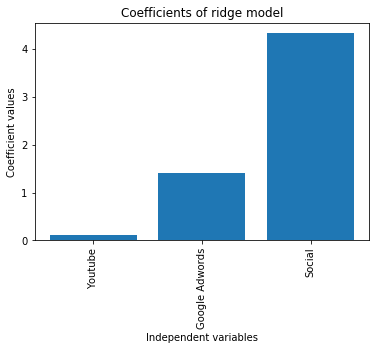

In [250]:
plt.bar(X2.columns, ridge_model_final.coef_)
plt.xticks(rotation = 90)
plt.xlabel('Independent variables')
plt.ylabel('Coefficient values')
plt.title('Coefficients of ridge model')
plt.show()

More proof that social gives the biggest positive factor in raising sales. Youtube giving the least. 

In [251]:
ridge_model_final.coef_

array([0.11871409, 1.40444379, 4.3211487 ])

For Youtube, every one unit increase in youtube spending is only 0.119 unit increase in sales. This does not seem very efficient and I would advise it to be dropped and focus on the other avenues. For Google Adwords, every one unit increase in spending, increases unit sales by 1.4 which seems like a more decent value. For Social, every one unit in spending increases the unit sales by a whopping 4.3. Relative to all, social does the best. 